# Satsense

Satsense is a remote sensing python package to facilitate slum detection in satelite images.

it comprises several capabilities:
* Image utilities - Loading and handling various satelite image formats
* Feature detection - Several common features for slum detection
* Performance - Performance metrics for detectoin algorithms

In this notebook we show how to calculate the normalized difference vegetation index.

In [16]:
# Some common packages used throughout the notebook
%load_ext autoreload
%autoreload 2

# Import the NumPy module
import numpy as np

# Convient for outputting dictionaries
import json

import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# Supported image formats include RGB, Quickbird and Worldview
from satsense.util import RGB, QUICKBIRD, WORLDVIEW2

# URI to the image
imagefile = '/home/bweel/Documents/projects/dynaslum/data/satelite/056239125010_01/056239125010_01_P001_MUL/08NOV02054348-M2AS_R1C1-056239125010_01_P001.TIF'
# Set the correct format here, it is used throughout the notebook
bands = QUICKBIRD

## Loading Image

To load an image use the `load_from_file` function. This function loads the file using gdal and returns the gdal image object as well as a numpy ndarray with all the layers loaded. This array is not normalized, if you need normalized values use `normalize_image`.

In [18]:
from satsense.util import load_from_file, normalize_image, get_rgb_image

# Loading the file
dataset, image = load_from_file(imagefile)


print('Red band mean: {e}, min: {i}, max: {a}'.format(e=image[:, :, bands['red']].mean(),
                                                      i=image[:, :, bands['red']].min(),
                                                      a=image[:, :, bands['red']].max()))

Red band mean: 294.9788136482239, min: 0.0, max: 2047.0


In [19]:
normalized_image = normalize_image(image, bands, technique='meanstd')

print('Red band mean: {e}, min: {i}, max: {a}'.format(e=normalized_image[:, :, bands['red']].mean(),
                                                      i=normalized_image[:, :, bands['red']].min(),
                                                      a=normalized_image[:, :, bands['red']].max()))

Red band mean: 0.49388956989453475, min: 0.03315709496048735, max: 1.0


## Normalized Difference Vegitation Index (NDVI)

Satsense implements several NDVI metrics:
* nirNDVI - Near-Infrared - Red NDVI
* rgNDVI - Red - Green NDVI
* rbNDVI - Red - Blue NDVI

After calling one of the ndvi calculations you can get print some stats using `print_ndvi_stats`

In [20]:
from satsense.features import rgNDVI, rbNDVI, nirNDVI, print_ndvi_stats

ndvi = nirNDVI(image, bands=bands)
print_ndvi_stats(ndvi)

NDVI matrix: 
[[        nan         nan         nan ...,         nan         nan
          nan]
 [        nan         nan         nan ...,         nan         nan
          nan]
 [        nan         nan         nan ...,         nan         nan
          nan]
 ..., 
 [        nan         nan         nan ...,  0.07417337  0.07142857
   0.09677419]
 [        nan         nan         nan ...,  0.1380531   0.08133971
   0.10617761]
 [        nan         nan         nan ...,  0.09706144  0.11276949
   0.12205128]]

Max NDVI: 0.9973992197659298
Mean NDVI: 0.2058800444480553
Median NDVI: 0.12020460358056266
Min NDVI: -0.9973992197659298


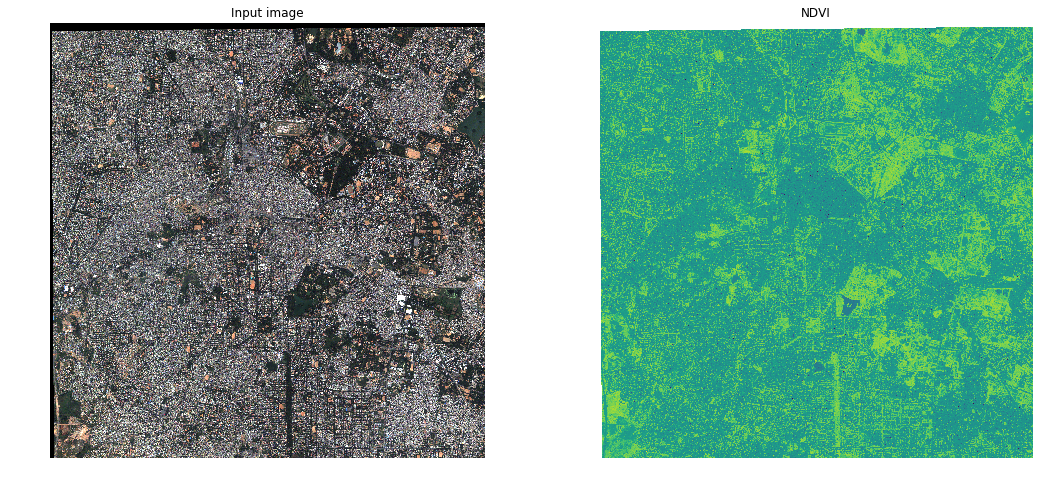

In [21]:
# Showing the result
img = get_rgb_image(image, bands, normalize=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

ax2.axis('off')
ax2.imshow(ndvi)
ax2.set_title('NDVI')
ax1.set_adjustable('box-forced')
plt.show()